# Regression Challenge (My Contribution)

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).


## Import the relevant libraries

In [199]:
#For Numerical Computations
import pandas as pd
import numpy as np

#For plots and Statistical Evaluation
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

#Discard and Ignore warnings
import warnings
import os

#for metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#For preprocessing and model_selection
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#For mathematical and scientific computation
import scipy as sp
import math

#For geometrical calculation
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#For models and algorithm
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


#For advanced modelling
!pip install catboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Review the data

In [ ]:
path = '/content/drive/MyDrive/ML Projects/Price per Unit Challenge/real_estate.csv'
data = pd.read_csv(path)
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

A lot of feature engineering will be done on this dataset

## Statistical summaries

In [ ]:
data.describe(include='all')

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### All features are numerical and have a different wide range, Hence some preprocessing steps such as scaling might be needed to produce a more well fitted and predictive model 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [ ]:
data.shape

(414, 7)

#### The dataset is pretty small 

## Explorative Data Analysis

<Figure size 1440x864 with 0 Axes>

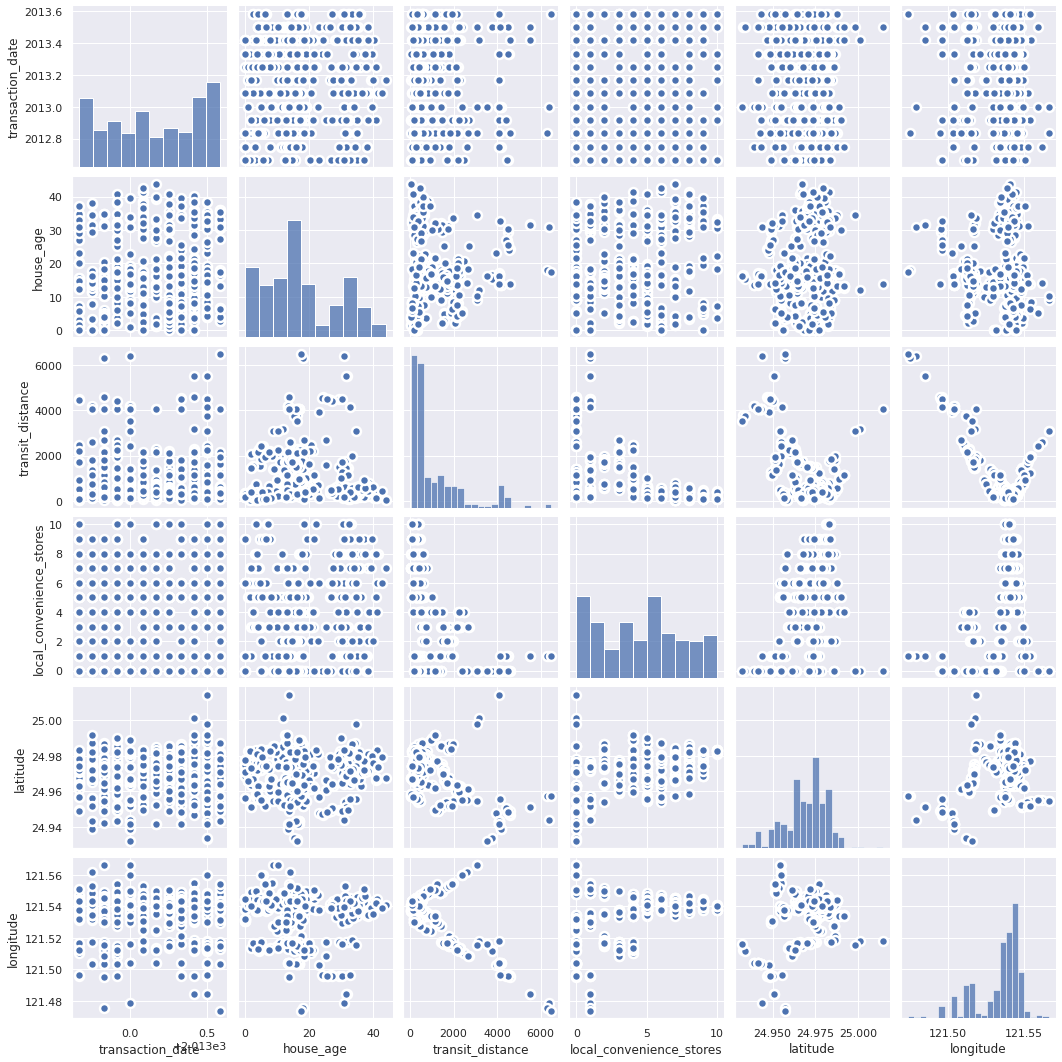

In [ ]:
## Check for correlation among features
plt.figure(figsize = (20, 12))
num_cols = ['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
sns.pairplot(data[num_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Transit distance have a corellation(negative towards the latitude and longitude)
Hence Features that can increase the predictive power of the geographic location can be created.

In [ ]:
#Checking for corellations in values
data.corr()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
transit_distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
local_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_per_unit,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [ ]:
#check for missing values
data.isnull().sum()


transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

No missing value discovered|

In [ ]:
#Check for duplicated values
data.duplicated().any()

False

No duplicated value discovered

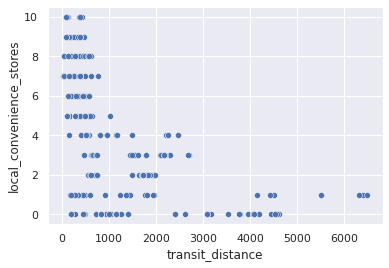

In [ ]:
#Visualize how transit distance compares with local covenience store
sns.scatterplot(data=data, x='transit_distance', y='local_convenience_stores')

larger convenience store are present in locations with less distance 

Convenience goods require easy access to let the customer quickly make a purchase. So a retail price feature can be generated to understand the price review for convenience stores.



In [ ]:
data['house_age'].dtype

dtype('float64')

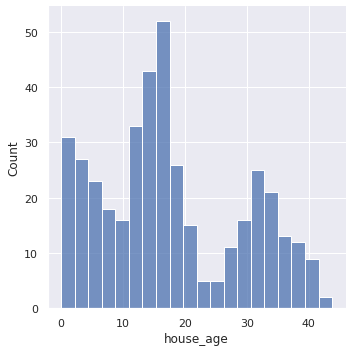

In [ ]:
#Check for Outliers
sns.displot(data, x=data['house_age'],bins=20)

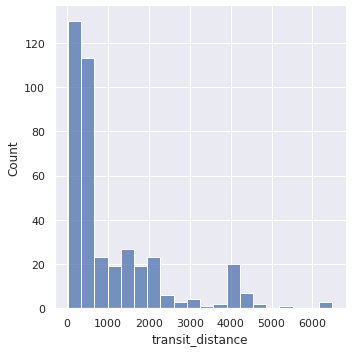

In [ ]:
sns.displot(data, x=data['transit_distance'],bins=20)

The data set is pretty small, hence leaving it is till okay

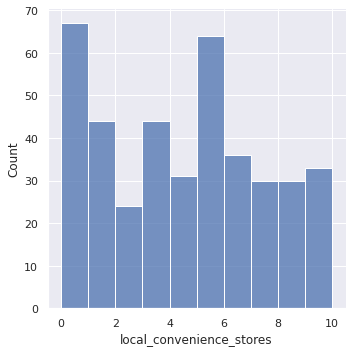

In [ ]:
sns.displot(data, x=data['local_convenience_stores'],bins=10)

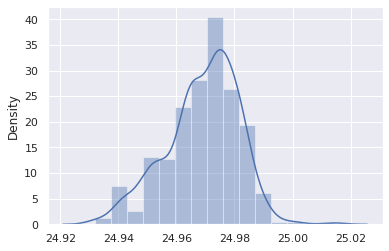

In [ ]:
sns.distplot(data, x=data['latitude'],bins=15)

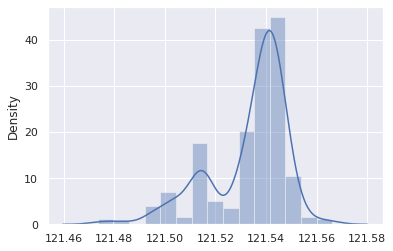

In [ ]:
sns.distplot(data, x=data['longitude'],bins=15)

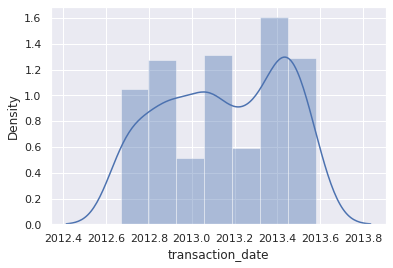

In [ ]:
sns.distplot(data['transaction_date'])

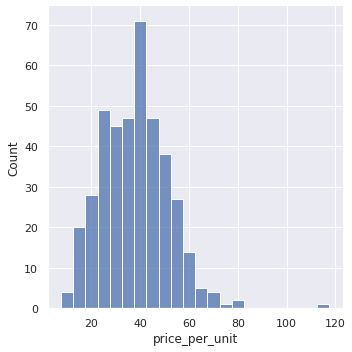

In [ ]:
sns.displot(data['price_per_unit'])

In [ ]:
#finding the number of outliers for the price_per_unit
data_out = data[data['price_per_unit']>data['price_per_unit'].quantile(0.99)]
data_out

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
105,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
166,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


The are five rows of outilers in the price per unit column,considering the dataset is petty small,i think its not okay getting rid of them.

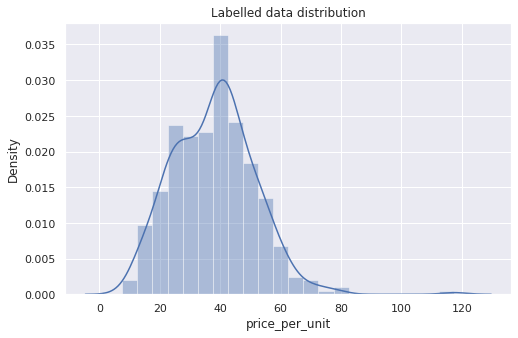

In [ ]:
#Check the target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.distplot(data["price_per_unit"])
plt.title('Labelled data distribution')
plt.show()

In [ ]:
#outline numerical columns
num_cols =['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit']

#function that analyse and give report of number and visulaisation of outliers
def num_of_outliers(data):
  num_cols = data.select_dtypes(include=['float64']).columns
  for col in (num_cols):
    num_of_outliers = data[data[col]>data[col].quantile(0.99)].shape[0]
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.histplot(x = data[col])
    fig.text(0.1, 0.95, f'There are {num_of_outliers} outlier rows in {col} column', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xlabel(' ', fontsize=20)
    plt.ylabel('')
    plt.yticks(fontsize=13)
    plt.box(False)

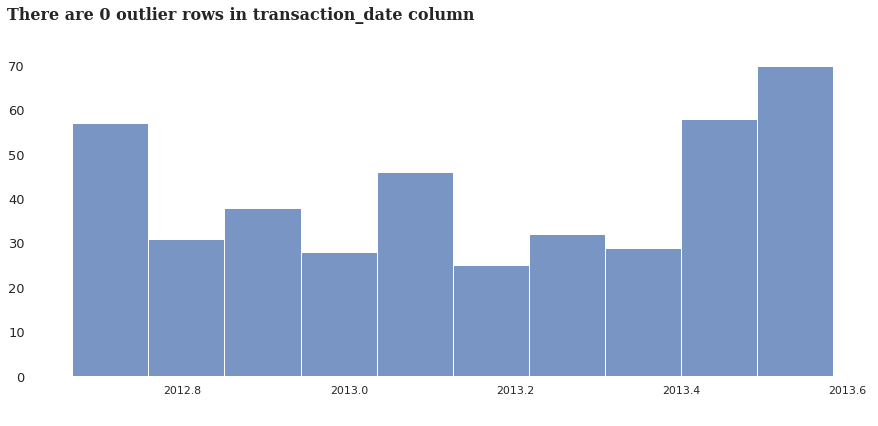

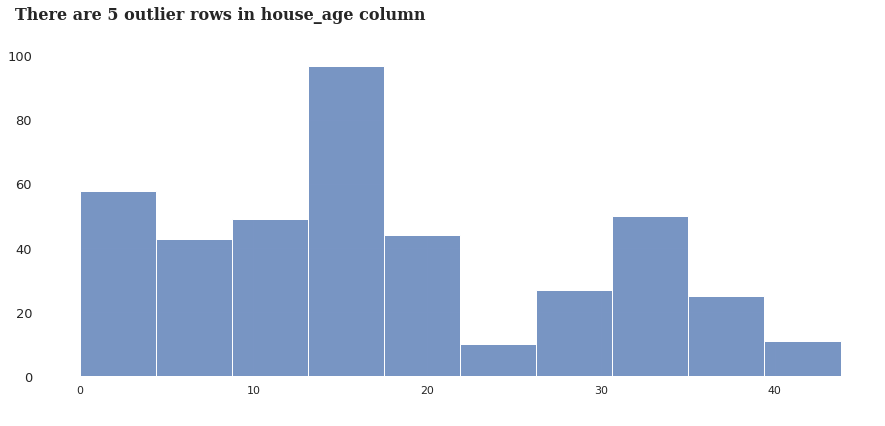

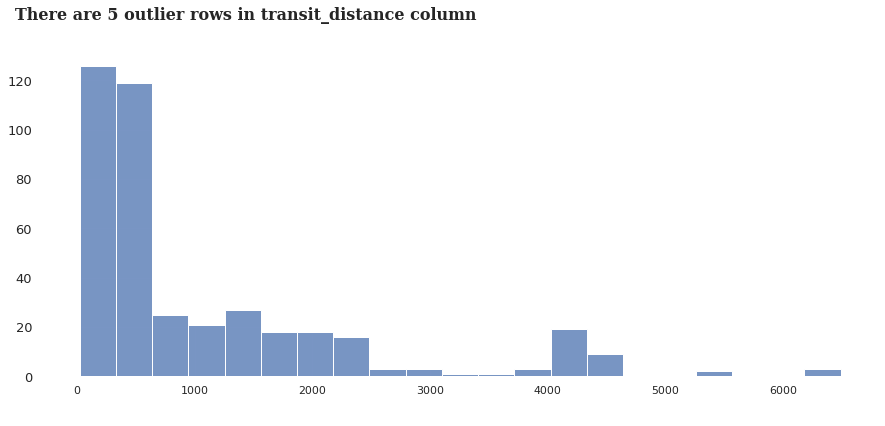

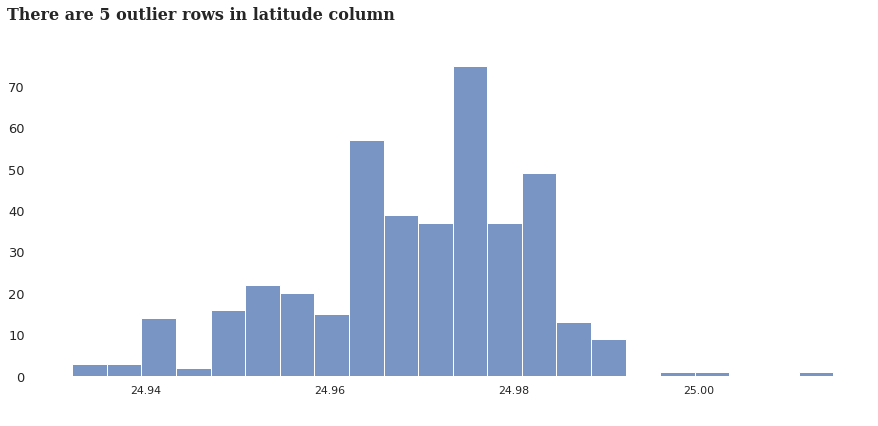

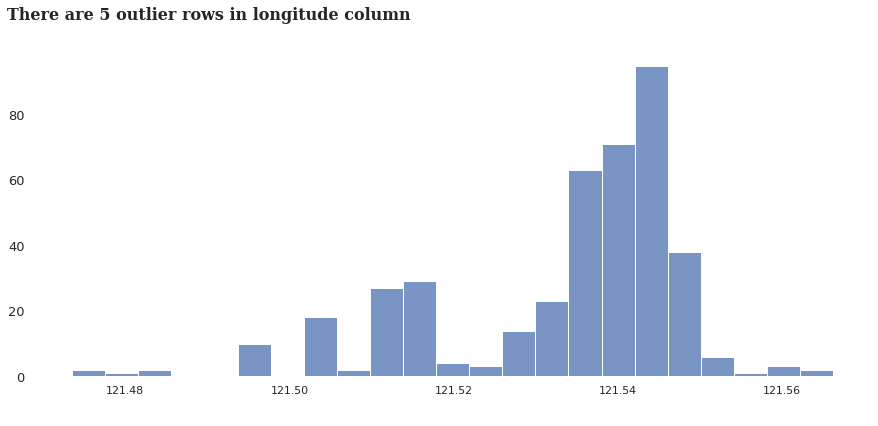

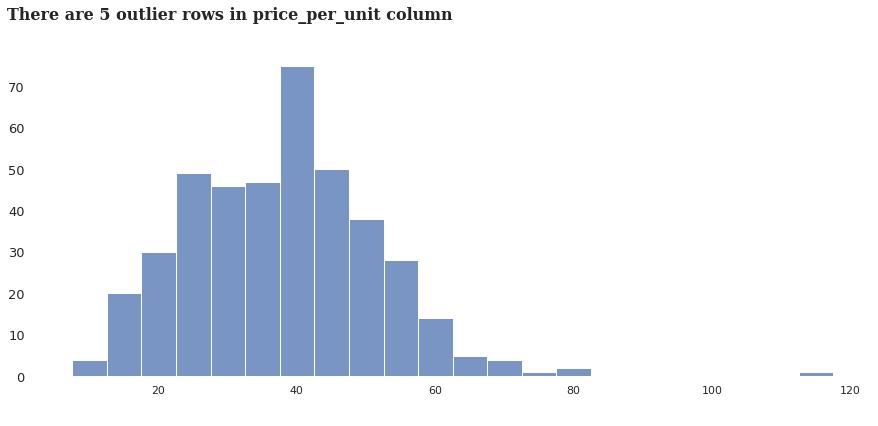

In [ ]:
#Finding the number of outliers
num_of_outliers(data)

Feature Engineering

In [ ]:
#Create a new feature called density
data['density'] = data['transit_distance']/data['local_convenience_stores']

In [ ]:
# Encode local convenient store using a label encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
#data['local_convenience_store'] = LE.fit_transform(data['local_convenience_stores'])

In [ ]:
#Creating features usable from the transaction date
data['year'] = data['transaction_date'].astype('string').str.split('.').str[0]
data['month']= data['transaction_date'].astype('string').str.split('.').str[1]

#Encoding the two columns (year and month)
data['year'] = LE.fit_transform(data['year'])
data['month'] = LE.fit_transform(data['month'])

#Drop Local convenience store
#data.drop(data['local_convenience_stores'], inplace = True)

In [ ]:
#Generating Zonal Locations from the feature latitude and longitude
data['zone1'] = data['latitude'] + data['longitude']
data['zone2'] = data['latitude'] - data['longitude']

In [ ]:

#Geospatial Feature Engineering
def bounding_box(lat, long, d_query=2.0, r_sphere=6371.):
    """Compute the bounding box around latitude and longitude for a point M on a sphere
    lat(float) = latitude in radians
    long(float) = longitude in radians
    d_query(float) = Distance d_query in km from M=(lat, lon)
    r_sphere(float) = radius of sphere in km
    """
    #calculate angular radius of query circle
    r_angular = d_query/r_sphere
    
    #compute min and max latitude
    lat_min = lat - r_angular
    lat_max = lat + r_angular
    
    #latitude of bounding box
    lat_t = np.arcsin(np.sin(lat)/np.cos(r_angular))
    
    delta_long = np.arccos((np.cos(r_angular) - np.sin(lat)*np.sin(lat_t)) / (np.cos(lat_t)*np.cos(lat)))
    
    #min and max longitude
    long_min = long - delta_long
    long_max = long + delta_long
    
    return lat_min, lat_max, long_min, long_max

  
  
def query_df_spatial(df, row, d_query=2.0, r_sphere=6371., long_col='longitude', lat_col='latitude'):
    """
    Returns a copy of a dataframe bounded by latitude and longitude at specific row
    df(pandas) = pandas dataframe MUST contain columns for longitude and latitude
    row(int): row idx
    d_query(float) = Distance d_query in km from M=(lat, lon)
    r_sphere(float) = radius of sphere
    long_col(str) = column for longitude
    lat_col(str) = column for latitude
    
    """
    
    lat, long = df[lat_col][row], df['longitude'][row]
    
    #get boundaries
    #lat_min, lat_max, long_min, long_max = bounding_box(lat, long, d_query=d_query, r_sphere=r_sphere)
    #query
    df_query = df[(df[long_col]<=long_max) & 
                 (df[long_col]>=long_min) & 
                  (df[lat_col]<=lat_max) & 
                 (df[lat_col]>=lat_min)].copy()
        
    return df_query

In [ ]:
#Performing geodesy with the task
#Compute the bounding box around latitude and longitude for a point M on a sphere
data['lat_min'] = bounding_box(data['latitude'],data['longitude'], d_query=2.0, r_sphere=6371.)[0]
data['lat_max'] = bounding_box(data['latitude'],data['longitude'], d_query=2.0, r_sphere=6371.)[1]
data['long_min'] = bounding_box(data['latitude'],data['longitude'], d_query=2.0, r_sphere=6371.)[2]
data['long_max'] = bounding_box(data['latitude'],data['longitude'], d_query=2.0, r_sphere=6371.)[3]

In [ ]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'density', 'year', 'month', 'zone1', 'zone2', 'lat_min', 'lat_max',
       'long_min', 'long_max'],
      dtype='object')

In [ ]:
#data.drop('lat',axis=1,inplace=True)

In [ ]:
# calculating euclidean distance between vectors
#from math import sqrt
# using distance.euclidean() method

# Import SciPi Library
#from scipy.spatial import distance

#point1 = np.array(data['lat_max'],data['lat_min'])
#point2 = np.array(data['long_max'],data['long_min'])
#Generating the euclidean min and max distance as a feature
#data['euclidean_distance'] = distance.euclidean(point1,point2)

In [ ]:
#Generating  a geometric mean
data["geom"] = data["latitude"].map(str) + ', ' + data['longitude'].map(str)

In [ ]:
#Reverse Geocoding
locator = Nominatim(user_agent="MyApp", timeout=5)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.00001)


In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [ ]:
#convert geometric mean to an address with specific location
data['address'] = data['geom'].progress_apply(rgeocode)

#convert geom to obtain the city and state
data['city'] = data.progress_apply(lambda x: x.address.raw['address'].get('city'),axis=1)
data['state'] = data.progress_apply(lambda x:x.address.raw['address'].get('state'),axis=1)

  0%|          | 0/414 [00:00<?, ?it/s]

  0%|          | 0/414 [00:00<?, ?it/s]

  0%|          | 0/414 [00:00<?, ?it/s]

In [ ]:
#generate city count per state as a feature
data['city_count_per_state'] = data.groupby(['state'])['city'].transform('nunique')

In [ ]:
#the city and state features are categorical hence encoding will preprocess them for the model
data['city'] = LE.fit_transform(data['city'])
data['state'] = LE.fit_transform(data['state'])

In [ ]:
#Since the geom,address are not needed again then we can drop them
#drop_col = ['geom','address']
#for i in drop_col:
 # data.drop(data[i],axis=1,inplace=True)


In [ ]:
#Check for correlation 
correlation = data.corr()['price_per_unit'].sort_values()
correlation

transit_distance           -0.673613
density                    -0.503675
house_age                  -0.210567
zone2                      -0.082100
city                       -0.054696
month                      -0.045723
year                        0.081545
transaction_date            0.087491
long_max                    0.523272
longitude                   0.523287
long_min                    0.523301
lat_min                     0.546307
lat_max                     0.546307
latitude                    0.546307
local_convenience_stores    0.571005
zone1                       0.633354
price_per_unit              1.000000
state                            NaN
city_count_per_state             NaN
Name: price_per_unit, dtype: float64

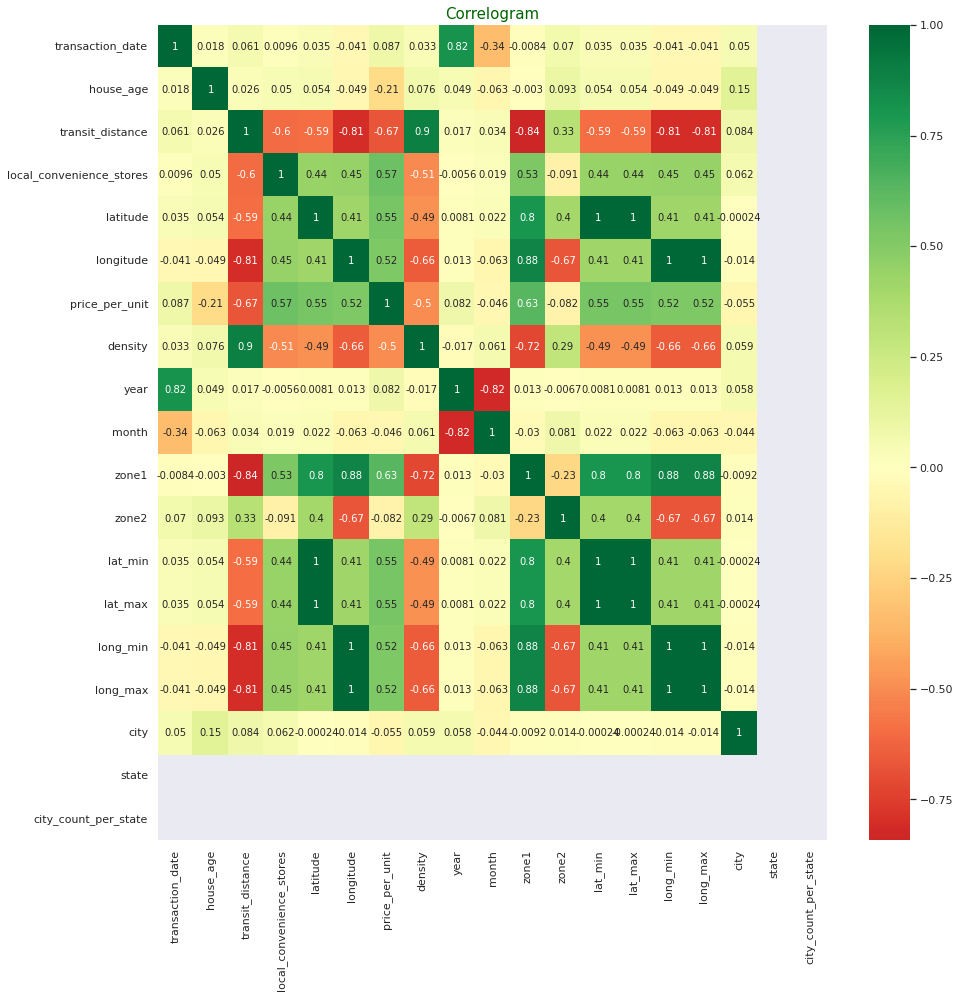

In [ ]:
#Visualising Corellation
corr = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

All Engineered columns are having a good corellation with there parent columns which actually makes sense.

transit_distance is a very good feature for predictive analysis. However, can any other feature be engineered from it with to obtain a new contributing feature?


zone1 (0.63) proves to be a more better feature for prediction and modelling than zone2 (-0.082)

PREPROCESSING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#dealing with infinity values in density column
data['density'] = data['density'].replace([np.inf, -np.inf], np.nan)
data['density'] = data['density'].fillna(data['density'].mean())

#then scaling
mms = MinMaxScaler()
scale_cols = ['house_age','transit_distance','density']
for i in scale_cols:
   data[i] = mms.fit_transform(data[i].values.reshape(-1,1))

In [ ]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'density', 'year', 'month', 'zone1', 'zone2', 'lat_min', 'lat_max',
       'long_min', 'long_max', 'geom', 'address', 'city', 'state',
       'city_count_per_state'],
      dtype='object')

In [ ]:
#lets take a look at the engineered features
eng_cols = ['density','year','month','zone1','zone2','lat_min','lat_max','long_min','long_max','city','state']
data[eng_cols].describe()

,density,year,month,zone1,zone2,lat_min,lat_max,long_min,long_max,city,state
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.0
mean,0.061871,0.695652,5.439614,146.502391,-96.564331,24.968716,24.969344,121.533043,121.533679,0.961353,0.0
std,0.126690,0.460687,3.381330,0.023385,0.015240,0.012410,0.012410,0.015347,0.015347,0.192986,0.0
min,0.000000,0.000000,0.000000,146.422580,-96.611670,24.931756,24.932384,121.473211,121.473849,0.000000,0.0
25%,0.007672,0.000000,3.000000,146.494550,-96.574613,24.962686,24.963314,121.527767,121.528403,1.000000,0.0
50%,0.020052,1.000000,5.000000,146.509030,-96.562730,24.970786,24.971414,121.538312,121.538948,1.000000,0.0
75%,0.061871,1.000000,8.000000,146.519195,-96.555645,24.977141,24.977769,121.542987,121.543623,1.000000,0.0
max,1.000000,1.000000,11.000000,146.532750,-96.503570,25.014276,25.014904,121.565951,121.566589,1.000000,0.0


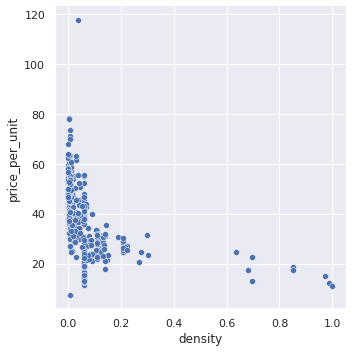

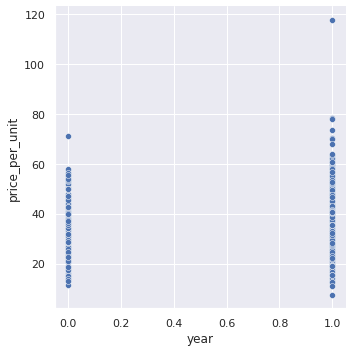

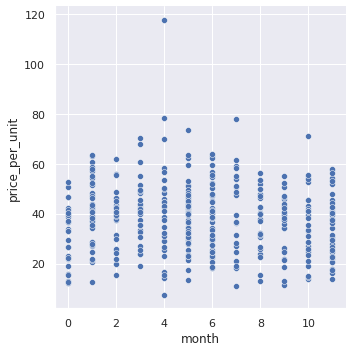

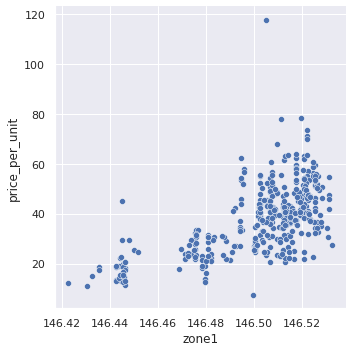

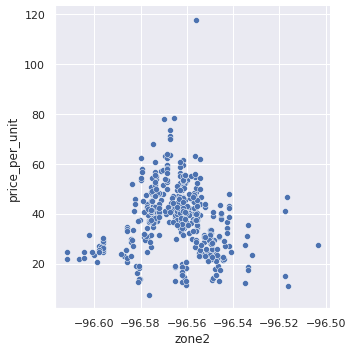

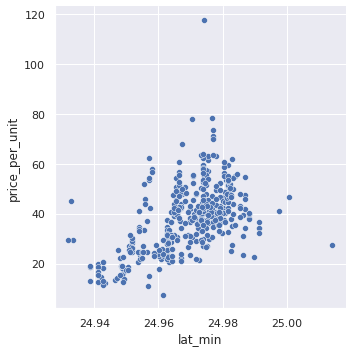

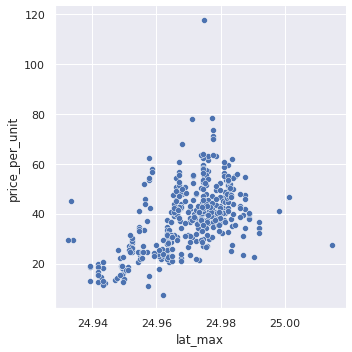

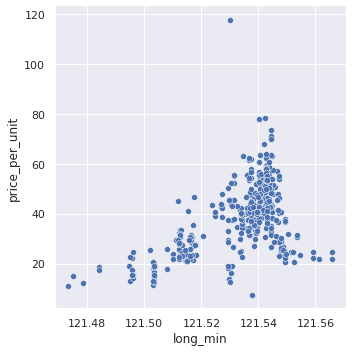

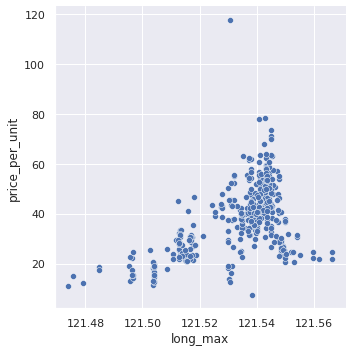

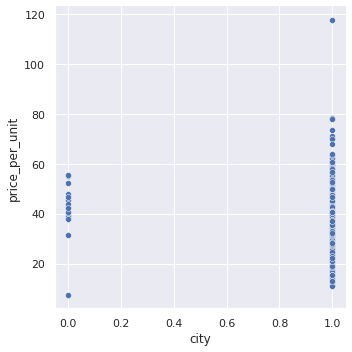

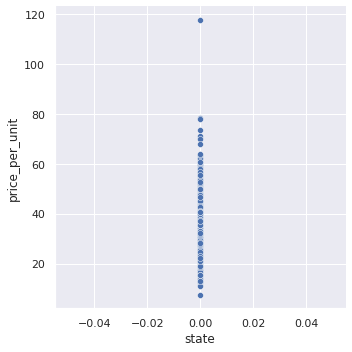

In [ ]:
for eng in eng_cols:
  ax = sns.relplot(
    data=data, x=eng, y="price_per_unit",kind="scatter")

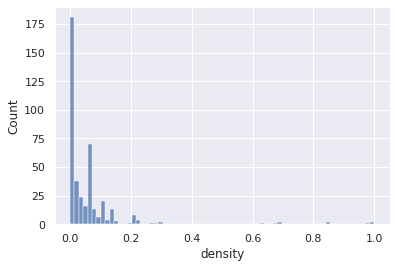

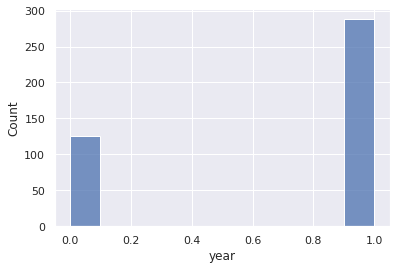

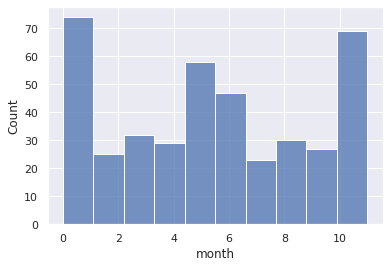

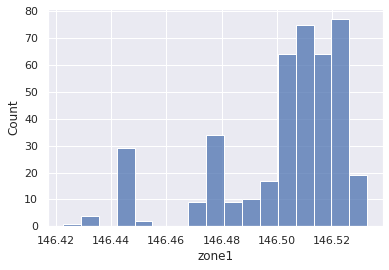

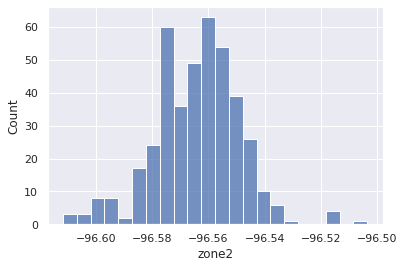

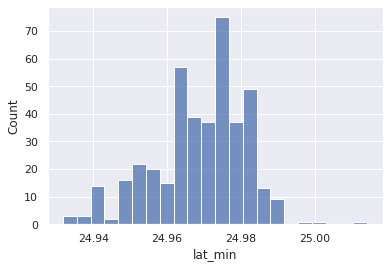

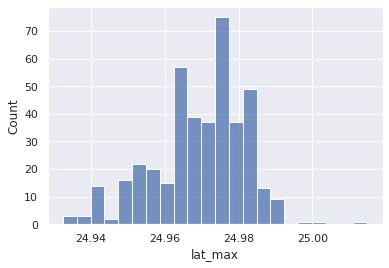

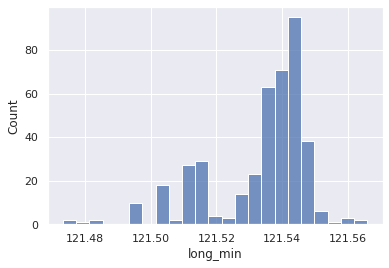

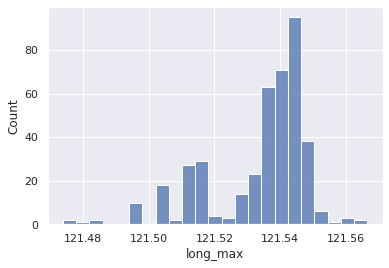

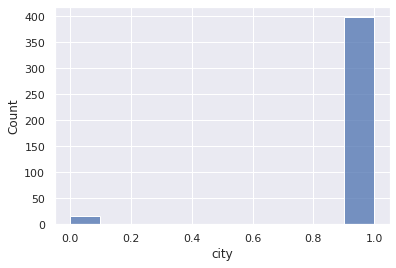

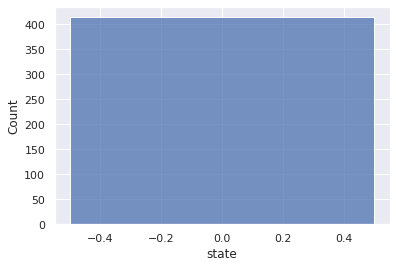

In [ ]:
for eng in eng_cols:
  fig, ax = plt.subplots(1,1, figsize=(6,4))
  sns.histplot(data[eng])  
  plt.xlabel(eng)

Most engineered features are discrete

In [ ]:
#generate a house age by city feature
data['house_age_by_city'] = data.groupby(['city','state'])['house_age'].transform('sum')

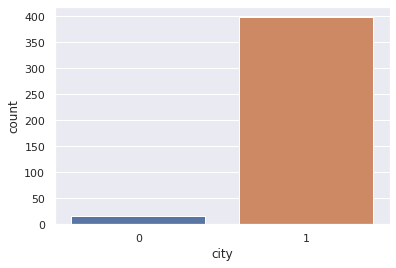

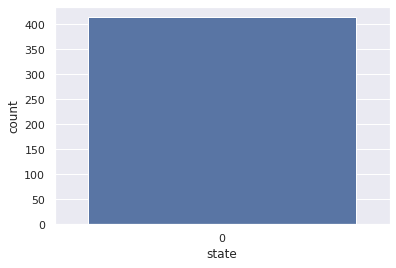

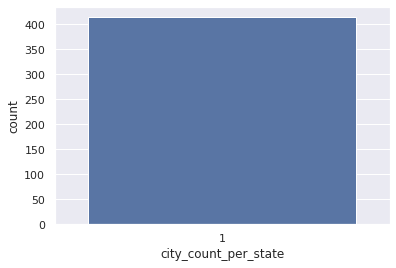

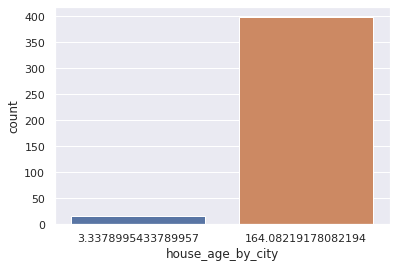

In [ ]:
loc_cols = ['city','state','city_count_per_state','house_age_by_city']
for loc in loc_cols:
  fig, ax = plt.subplots(1,1, figsize=(6,4))
  sns.countplot(data[loc])  
  plt.xlabel(loc)

The whole observation seems to be based on a particular state ,However the cities are two 

House age of bigger number of years are present in the farther city

Does this make there price much higher?

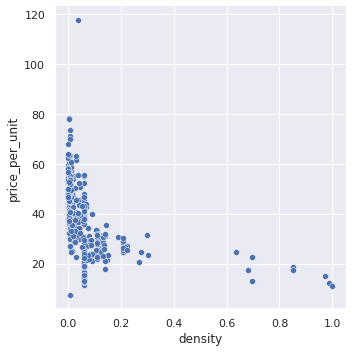

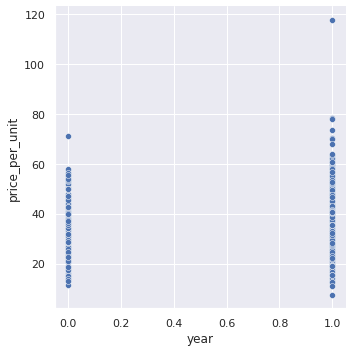

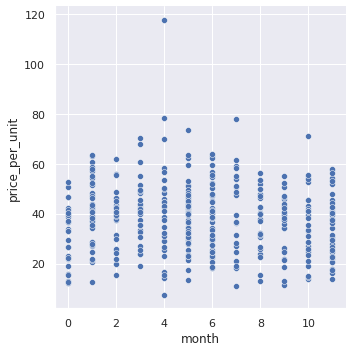

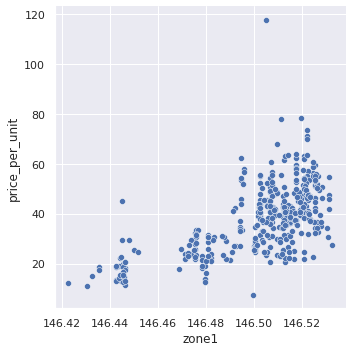

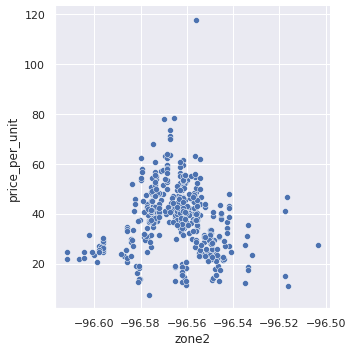

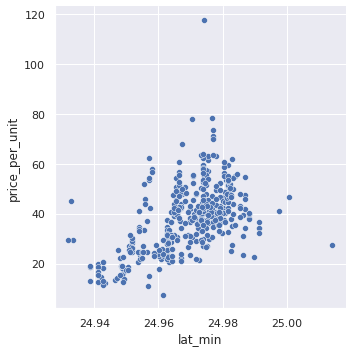

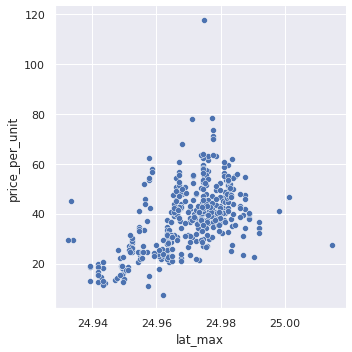

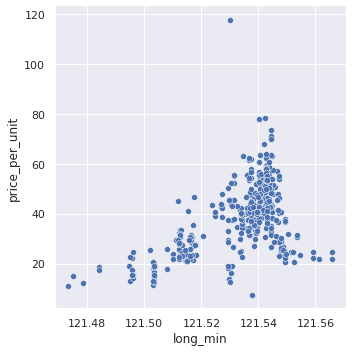

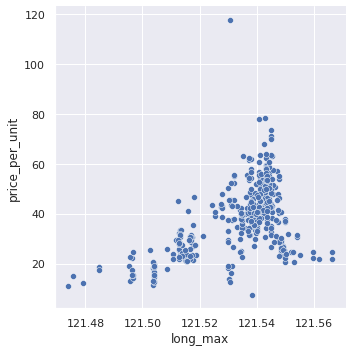

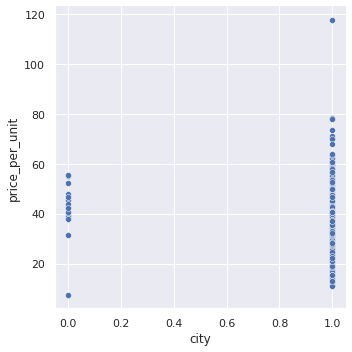

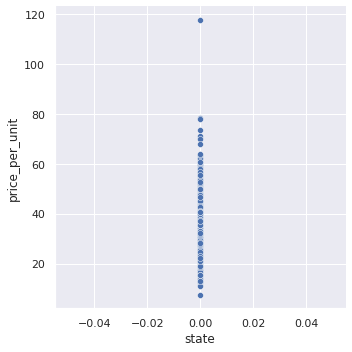

In [ ]:
#check there corellation with target
for eng in eng_cols:
  ax = sns.relplot(
    data=data, x=eng, y="price_per_unit",kind="scatter")

* A larger far away breadthwise house (in terms of west) has a probability of much higher price tha his counterpart at the other end.

* And also houses which are more farther away northwise tend to have a much larger price than the rest..Does this means that there are access to a much larger human needs and amenities over there?

* What seems to be the factore that makes them more higher in price ..closeness to amenities? or local convenience_store?

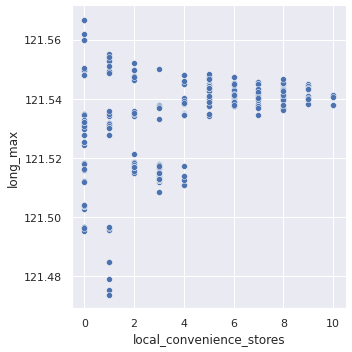

In [ ]:
sns.relplot(x=data['local_convenience_stores'],y=data['long_max'],kind='scatter')

* Local convenience stores are much more located at far places of higher longitude.

In [169]:
#perform some feature engineering on the location
def bearing_array(lat, lng):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lat - lng)
    lat, lng = map(np.radians, (lat, lng))
    y = np.sin(lng_delta_rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(lng) * np.cos(lng) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
data['bearing'] = bearing_array(data['latitude'].values, data['longitude'].values)
cols=['latitude','longitude']

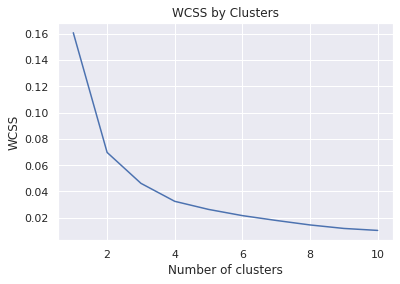

In [171]:
# To determine the number of clusters
# Create 10 models ranging 1 - 10 number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # fitting the datapoints
    kmeans.fit(data[cols].values)
    # Obtain the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
# Plotting the WCSS values on a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Number of clusters is to be two 

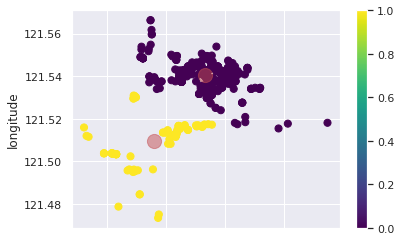

In [172]:
#invite kmeans clustering (unsupervised) to create some meaningful mapping
from sklearn.cluster import KMeans


# Cluster Lat and Long 
kmeans = KMeans(n_clusters =2, init ='k-means++')
kmeans.fit(data[['latitude','longitude']])
data['cluster_label'] = kmeans.fit_predict(data[['latitude','longitude']])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(data[['latitude','longitude']])


# Full_data['cluster_label'].value_counts()
data.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [183]:
columns = data.drop(['transaction_date','price_per_unit','local_convenience_stores','house_age_by_city','geom','address'],axis=1).columns
data1 = data[columns].copy()
km=KMeans(10,random_state=32)
data["cluster"]=km.fit_predict(data1[columns]).astype('float64')

In [185]:
data['Cluster_label_encoded'] = data.groupby('cluster_label')['price_per_unit'].transform('mean')

Splitting into train and test

In [186]:
data.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'density', 'year', 'month', 'zone1', 'zone2', 'lat_min', 'lat_max',
       'long_min', 'long_max', 'geom', 'address', 'city', 'state',
       'city_count_per_state', 'house_age_by_city', 'bearing', 'cluster_label',
       'cluster', 'Cluster_label_encoded'],
      dtype='object')

In [187]:
data.shape

(414, 26)

In [188]:
train = data.loc[:279,:]
test = data.loc[280:,:]

print(train.shape,test.shape)

(280, 26) (134, 26)


In [189]:
train.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'density', 'year', 'month', 'zone1', 'zone2', 'lat_min', 'lat_max',
       'long_min', 'long_max', 'geom', 'address', 'city', 'state',
       'city_count_per_state', 'house_age_by_city', 'bearing', 'cluster_label',
       'cluster', 'Cluster_label_encoded'],
      dtype='object')

In [190]:
test.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit',
       'density', 'year', 'month', 'zone1', 'zone2', 'lat_min', 'lat_max',
       'long_min', 'long_max', 'geom', 'address', 'city', 'state',
       'city_count_per_state', 'house_age_by_city', 'bearing', 'cluster_label',
       'cluster', 'Cluster_label_encoded'],
      dtype='object')

In [204]:
test1 = test.drop(['price_per_unit','geom','address'],axis=1)

MODELLING

In [206]:
train.columns.values

array(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude',
       'price_per_unit', 'density', 'year', 'month', 'zone1', 'zone2',
       'lat_min', 'lat_max', 'long_min', 'long_max', 'geom', 'address',
       'city', 'state', 'city_count_per_state', 'house_age_by_city',
       'bearing', 'cluster_label', 'cluster', 'Cluster_label_encoded'],
      dtype=object)

In [207]:
corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
to_drop

['lat_min',
 'lat_max',
 'long_min',
 'long_max',
 'house_age_by_city',
 'Cluster_label_encoded']

In [210]:
train[to_drop].corr()

,lat_min,lat_max,long_min,long_max,house_age_by_city,Cluster_label_encoded
lat_min,1.000000,1.000000,0.458312,0.458245,-0.001445,0.585585
lat_max,1.000000,1.000000,0.458312,0.458245,-0.001445,0.585585
long_min,0.458312,0.458312,1.000000,1.000000,-0.019829,0.861946
long_max,0.458245,0.458245,1.000000,1.000000,-0.019830,0.861930
house_age_by_city,-0.001445,-0.001445,-0.019829,-0.019830,1.000000,-0.122541
Cluster_label_encoded,0.585585,0.585585,0.861946,0.861930,-0.122541,1.000000


LIGHT GRADIENT BOOSTING MACHINE

In [213]:
# Initialize an empty array to hold feature importances
X = train.drop(['price_per_unit','geom','address'],axis=1)
y = train['price_per_unit']

feature_importances_lgbm = np.zeros(X.shape[1])

# Create the model with several hyperparameters
LGBMmodel2 = LGBMRegressor(n_estimators=10000,
                      random_state=32,
                      seed=25,
                      min_child_samples=10,
                      learning_rate=0.03,
                      max_depth=9,
                      min_gain_to_split=0.35,
                      colsample_bytree = 0.31780576366140434)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    LGBMmodel2.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], 
              eval_metric = 'rmse', verbose = 200)
    
    # Record the feature importances
    feature_importances_lgbm += LGBMmodel2.feature_importances_

# Make sure to average feature importances! 
feature_importances_lgbm = feature_importances_lgbm / 2
feature_importances_lgbm = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_lgbm}).sort_values('importance', ascending = False)


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's l2: 31.3569	valid_0's rmse: 5.59973
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 27.7504	valid_0's rmse: 5.26787
Early stopping, best iteration is:
[138]	valid_0's l2: 26.7279	valid_0's rmse: 5.1699


In [214]:
# Find the features with zero importance
zero_features = list(feature_importances_lgbm[feature_importances_lgbm['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_lgbm.head(100)

There are 4 features with 0.0 importance


,feature,importance
1,house_age,143.5
5,longitude,142.0
4,latitude,133.0
2,transit_distance,129.5
6,density,125.0
11,lat_min,116.5
10,zone2,112.5
13,long_min,104.0
9,zone1,104.0
19,bearing,91.0


In [215]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

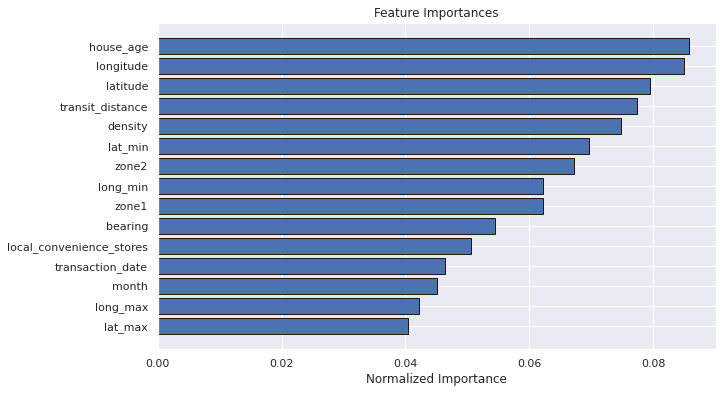

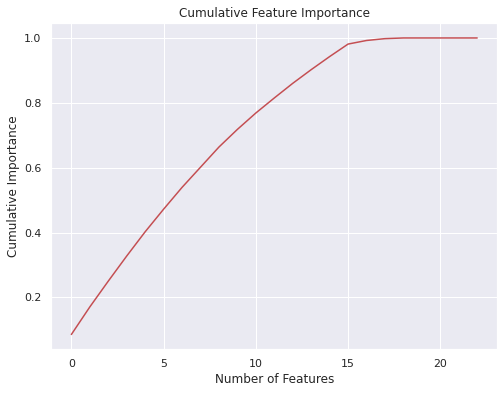

14 features required for 0.90 of cumulative importance


In [216]:
norm_feature_importances = plot_feature_importances(feature_importances_lgbm)

CATBOOST

In [218]:
# Initialize an empty array to hold feature importances
X = train.drop(['price_per_unit','geom','address'],axis=1)
y = train['price_per_unit']
feature_importances_cbc = np.zeros(X.shape[1])

# Create the model with several hyperparameters
CBCmodel = CatBoostRegressor(bootstrap_type='MVS',
                          random_state=32,
                          depth=5,
                          l2_leaf_reg=2.0,
                          iterations=4500.0,
                          colsample_bylevel=0.05810457490314546,
                          silent=True)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    CBCmodel.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], verbose = 200)
    
    # Record the feature importances
    feature_importances_cbc += CBCmodel.feature_importances_

# Make sure to average feature importances! 
feature_importances_cbc = feature_importances_cbc / 2
feature_importances_cbc = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_cbc}).sort_values('importance', ascending = False)

0:	learn: 14.6252109	test: 11.3979830	best: 11.3979830 (0)	total: 46.4ms	remaining: 3m 28s
200:	learn: 7.5272870	test: 5.6089977	best: 5.6089977 (200)	total: 234ms	remaining: 5.01s
400:	learn: 6.2012373	test: 5.4604906	best: 5.4003939 (346)	total: 388ms	remaining: 3.96s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 5.400393933
bestIteration = 346

Shrink model to first 347 iterations.
0:	learn: 14.4083989	test: 12.0934336	best: 12.0934336 (0)	total: 513us	remaining: 2.31s
200:	learn: 7.6817752	test: 5.5922097	best: 5.5922097 (200)	total: 138ms	remaining: 2.94s
400:	learn: 6.2107606	test: 5.3238028	best: 5.2903934 (361)	total: 286ms	remaining: 2.92s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 5.290393394
bestIteration = 361

Shrink model to first 362 iterations.


In [221]:
feature_importances_cbc.head()

,feature,importance
2,transit_distance,15.588298
6,density,14.579793
1,house_age,12.514392
4,latitude,10.509854
14,long_max,5.812947


In [224]:
# Find the features with zero importance
zero_features = list(feature_importances_cbc[feature_importances_cbc['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_cbc.tail()

There are 2 features with 0.0 importance


,feature,importance
21,cluster,1.115592
18,house_age_by_city,0.604632
15,city,0.478644
16,state,0.000000
17,city_count_per_state,0.000000


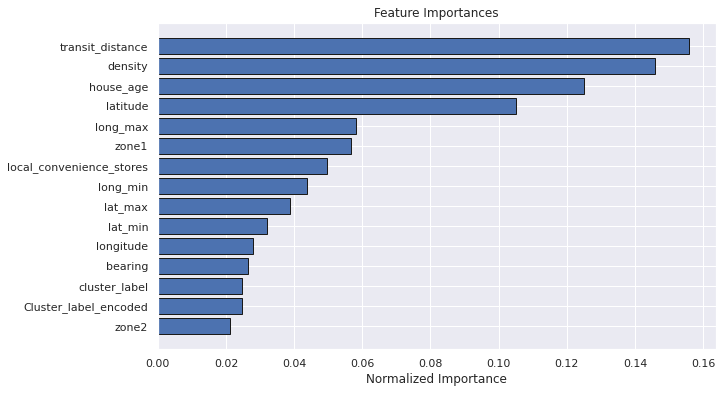

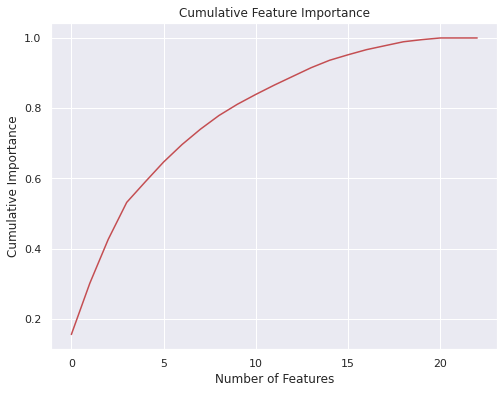

14 features required for 0.90 of cumulative importance


In [225]:
norm_feature_importances = plot_feature_importances(feature_importances_cbc)

MODEL OPTIMIZATION BY OPTUNA

In [226]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 209 kB 35.8 MB/s 
     |████████████████████████████████| 81 kB 7.2 MB/s 
     |████████████████████████████████| 78 kB 3.9 MB/s 
     |████████████████████████████████| 146 kB 50.0 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 112 kB 40.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d78637cde4aad8b34b523547d59a49a0a83db6e7da78030b2a5a0c29329b3570
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [227]:
import optuna

In [229]:
X = train.drop(['price_per_unit','geom','address'],axis=1)
y = train['price_per_unit']

In [233]:
def objective(trial):
  oof_f1 = []
  oof_predictions = []

  param={}
  param['n_estimators'] = 10000
  param['min_child_samples'] = trial.suggest_int("min_child_samples",1,32)
  param['learning_rate'] = trial.suggest_float("learning_rate", 0.01, 0.3,log=True)
  param["max_depth"] =  9
  param["min_gain_to_split"] = trial.suggest_float("min_gain_to_split", 0, 1)
  param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)


  fold= KFold(n_splits=5)
  i=1
  for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    LGBMmodel3 = LGBMRegressor(**param,random_state=42)

    
    LGBMmodel3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)
    lgbpreds=LGBMmodel3.predict(X_test)
    oof_f1.append(sqrt(mean_squared_error(y_test,lgbpreds)))

  return np.mean(oof_f1)

In [234]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)
print(study.best_params)

[I 2022-06-02 17:30:42,130] A new study created in memory with name: no-name-490537c3-fb18-4702-abcd-0958c24d8d50
[I 2022-06-02 17:30:48,002] Trial 0 finished with value: 8.099237870350393 and parameters: {'min_child_samples': 5, 'learning_rate': 0.033096613636093605, 'min_gain_to_split': 0.5158818187802978, 'colsample_bytree': 0.37670647479499664}. Best is trial 0 with value: 8.099237870350393.
[I 2022-06-02 17:30:51,681] Trial 1 finished with value: 7.679657454034872 and parameters: {'min_child_samples': 27, 'learning_rate': 0.012035788145319724, 'min_gain_to_split': 0.5958190777160844, 'colsample_bytree': 0.7490565873709218}. Best is trial 1 with value: 7.679657454034872.
[I 2022-06-02 17:30:51,999] Trial 2 finished with value: 7.840887041410975 and parameters: {'min_child_samples': 19, 'learning_rate': 0.21565700496128817, 'min_gain_to_split': 0.8311530319537421, 'colsample_bytree': 0.5475573524761488}. Best is trial 1 with value: 7.679657454034872.
[I 2022-06-02 17:30:52,976] Tria

{'min_child_samples': 31, 'learning_rate': 0.28368249838995263, 'min_gain_to_split': 0.3540006199265197, 'colsample_bytree': 0.4394209473064036}


In [235]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 7.494362015020657
  Params: 
    min_child_samples: 31
    learning_rate: 0.28368249838995263
    min_gain_to_split: 0.3540006199265197
    colsample_bytree: 0.4394209473064036


In [236]:
lgb_oof_predictions=[]


param = trial.params



fold=KFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    LGBMmodel4 = LGBMRegressor(**param)

    LGBMmodel4.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    lgbpreds=LGBMmodel4.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,lgbpreds)))
    oof_f1.append(sqrt(mean_squared_error(y_test,lgbpreds)))



err:  6.5362358170811286
err:  7.064600056140519
err:  8.545348261865875
err:  7.3739374317837925
err:  12.305813652413667


In [239]:
def objective2(trial):
  oof_f1 = []
  oof_predictions = []
  param = {}
  bootstrap_type='MVS',
  depth=5,
  l2_leaf_reg=2.0,
  iterations=4500.0,
  colsample_bylevel=0.05810457490314546
  silent=True
  param['depth'] = trial.suggest_int('depth', 3, 15)
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 8.0, 0.5)
  param['iterations'] = trial.suggest_discrete_uniform("iterations", 1000, 30000, 1500)
  param['use_best_model'] = True
  param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)

  fold= KFold(n_splits=5)
  i=1
  for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    CBCmodel2 = CatBoostRegressor(**param,random_state=42)

    
    CBCmodel2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    CBCpreds=CBCmodel2.predict(X_test)
    oof_f1.append(sqrt(mean_squared_error(y_test,CBCpreds)))

  return np.mean(oof_f1)

In [240]:
study_cbc = optuna.create_study(direction="minimize")
study_cbc.optimize(objective2, n_trials=100)
print(study_cbc.best_params)

[I 2022-06-02 17:39:00,737] A new study created in memory with name: no-name-b394e513-225f-49b5-a2b5-94cf886d7bde
[I 2022-06-02 17:39:02,378] Trial 0 finished with value: 7.4121998493918495 and parameters: {'depth': 7, 'l2_leaf_reg': 2.5, 'iterations': 16000.0, 'colsample_bylevel': 0.07399589571287096}. Best is trial 0 with value: 7.4121998493918495.
[I 2022-06-02 17:39:04,106] Trial 1 finished with value: 7.507141488579499 and parameters: {'depth': 6, 'l2_leaf_reg': 3.0, 'iterations': 20500.0, 'colsample_bylevel': 0.018329444007037947}. Best is trial 0 with value: 7.4121998493918495.
[I 2022-06-02 17:39:06,808] Trial 2 finished with value: 7.514676586787526 and parameters: {'depth': 9, 'l2_leaf_reg': 4.5, 'iterations': 16000.0, 'colsample_bylevel': 0.07457613495964104}. Best is trial 0 with value: 7.4121998493918495.
[I 2022-06-02 17:39:08,617] Trial 3 finished with value: 7.568301821419913 and parameters: {'depth': 11, 'l2_leaf_reg': 6.5, 'iterations': 16000.0, 'colsample_bylevel': 0

{'depth': 15, 'l2_leaf_reg': 6.5, 'iterations': 7000.0, 'colsample_bylevel': 0.07034822316514215}


In [246]:
print("Number of finished trials: {}".format(len(study_cbc.trials)))

print("Best trial:")
trial = study_cbc.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 7.4068445779653755
  Params: 
    depth: 15
    l2_leaf_reg: 6.5
    iterations: 7000.0
    colsample_bylevel: 0.07034822316514215


In [248]:
oof_f1=[]
cbc_oof_predictions=[]


param_cbc = trial.params



fold=KFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    CBCmodel3 = CatBoostRegressor(**param_cbc)

    CBCmodel3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    CBCpreds=CBCmodel3.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,CBCpreds)))
    oof_f1.append(sqrt(mean_squared_error(y_test,CBCpreds)))
    
print(np.mean(oof_f1))

err:  6.383723400427746
err:  5.244886168317607
err:  8.270375898249009
err:  6.243243717490033
err:  11.37857913840185
7.504161664577248


In [205]:
param = {'objective':'rmse',
              'boosting_type': 'gbdt',
              'random_state':25,
              'learning_rate':0.08,
              'is_unbalance': 'true',
               'num_leaves': 2 **5,
              'subsample':0.8,
              'max_features':'sqrt',
            
              'colsample_bytree':0.5,
              'early_stopping_rounds':10,
             
              'reg_lambda':0.95,
              'reg_alpha': 0.95}
fold=KFold(n_splits=5,shuffle=True,random_state=32)
oof_f1 = []
lgbm_pred = []
from math import sqrt
X = train.drop(['price_per_unit','geom','address'],axis=1)
y = train['price_per_unit']
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    LGBMmodel = LGBMRegressor(**param)

    LGBMmodel.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    LGBMpreds = LGBMmodel.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,LGBMpreds)))
    oof_f1.append(sqrt(mean_squared_error(y_test,LGBMpreds)))
    lgbm_pred.append(LGBMmodel.predict(test1))
print(np.mean(oof_f1))


err:  7.032346869714352
err:  11.402937731580538
err:  6.040195033525332
err:  7.591022429069347
err:  6.66354198482434
7.746008809742781
